In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Definir el path al documento CSV
file_path = 'datasets/clustering_database.csv'

# Leer el documento CSV
df = pd.read_csv(file_path)

#Imprimiendo las 5 primeras filas 
df.head()

,fullVisitorID,channelgrouping,date,OS,Apparel,Office,Electronics,LimitedSupply,Accessories,ShopByBrand,Bags,totalSpent_USD
0,2886674552607729793,Referral,20160901,Linux,0,0,1,0,0,0,0,5.59
1,876940283010756174,Referral,20160901,Macintosh,1,0,0,0,0,0,0,33.99
2,1957458976293878100,Organic Search,20160901,Windows,0,0,2,0,0,0,0,329.47
3,3044311821343900129,Organic Search,20160901,Macintosh,0,0,0,0,0,0,0,1.99
4,3890747985732303742,Organic Search,20160901,Macintosh,1,0,0,0,0,0,0,51.99


In [4]:
# Observando el tipo de información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38670 entries, 0 to 38669
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fullVisitorID    38670 non-null  uint64 
 1   channelgrouping  38670 non-null  object 
 2   date             38670 non-null  int64  
 3   OS               38670 non-null  object 
 4   Apparel          38670 non-null  int64  
 5   Office           38670 non-null  int64  
 6   Electronics      38670 non-null  int64  
 7   LimitedSupply    38670 non-null  int64  
 8   Accessories      38670 non-null  int64  
 9   ShopByBrand      38670 non-null  int64  
 10  Bags             38670 non-null  int64  
 11  totalSpent_USD   38670 non-null  float64
dtypes: float64(1), int64(8), object(2), uint64(1)
memory usage: 3.5+ MB


La definición de las variables son las siguientes:
* `fullVisitorID`: Identificador del cliente
* `channelgrouping`: Medio por el cual llegó al sitio web
* `date`: dia
* `OS`: Tipo de dispositivo con el que entro al sitio web
* `Apparel`, `Office`, `Electronics`, `LimitedSupply`, `Accessories`, `ShopByBrand`, `Bags`: Categorias de los productos comprados
* `totalSpent_USD`: Total gastado


Por cada variable, tenemos una cantidad de valores, veamos:
* La cantidad de medios que se tienen en `channelgrouping` .
* Los días estudiados y el año `date`.
* El tipo de dispositivo con el que se entro al sitio web con `OS`.

In [40]:
# Lista de columnas para ver elementos únicos
_list = ["channelgrouping", "date", "OS"]

for column in _list:
    unique_values = df[column].unique()
    if column == "date":
        list_year_unique_values = list(set([str(value)[:4] for value in unique_values]))
        list_month_unique_values = list(set([str(value)[4:6] for value in unique_values]))
        list_month_unique_values.sort()
        print(f"Para la columna `{column}` se tienen que los años de estudio son (es):\n{list_year_unique_values}")
        print(f"y para los meses {list_month_unique_values}.\n")
    else:
        print(f"Para la columna `{column}` se tienen que los valores únicos son:\n{unique_values}\n")

Para la columna `channelgrouping` se tienen que los valores únicos son:
['Referral' 'Organic Search' 'Paid Search' 'Direct' 'Social' 'Display'
 'Affiliates']

Para la columna `date` se tienen que los años de estudio son (es):
['2016']
y para los meses ['08', '09', '10', '11', '12'].

Para la columna `OS` se tienen que los valores únicos son:
['Linux' 'Macintosh' 'Windows' 'Chrome OS' 'Android' 'iOS' 'Windows Phone'
 '(not set)' 'BlackBerry' 'SunOS']



In [47]:
df.describe()

,fullVisitorID,date,Apparel,Office,Electronics,LimitedSupply,Accessories,ShopByBrand,Bags,totalSpent_USD
count,3.867000e+04,3.867000e+04,38670.000000,38670.000000,38670.000000,38670.000000,38670.000000,38670.000000,38670.000000,38670.000000
mean,4.483221e+18,2.016100e+07,1.945074,0.531601,0.523946,0.107292,0.474321,0.313757,0.551565,171.123992
std,3.058644e+18,1.458918e+02,4.751453,2.685681,1.875687,0.798183,1.813800,1.617949,1.792594,281.290067
min,5.103959e+12,2.016080e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.606532e+18,2.016090e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.970000
50%,4.344901e+18,2.016101e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.960000
75%,7.135485e+18,2.016112e+07,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199.980000
max,9.999801e+18,2.016123e+07,200.000000,340.000000,103.000000,30.000000,99.000000,68.000000,48.000000,8673.740000


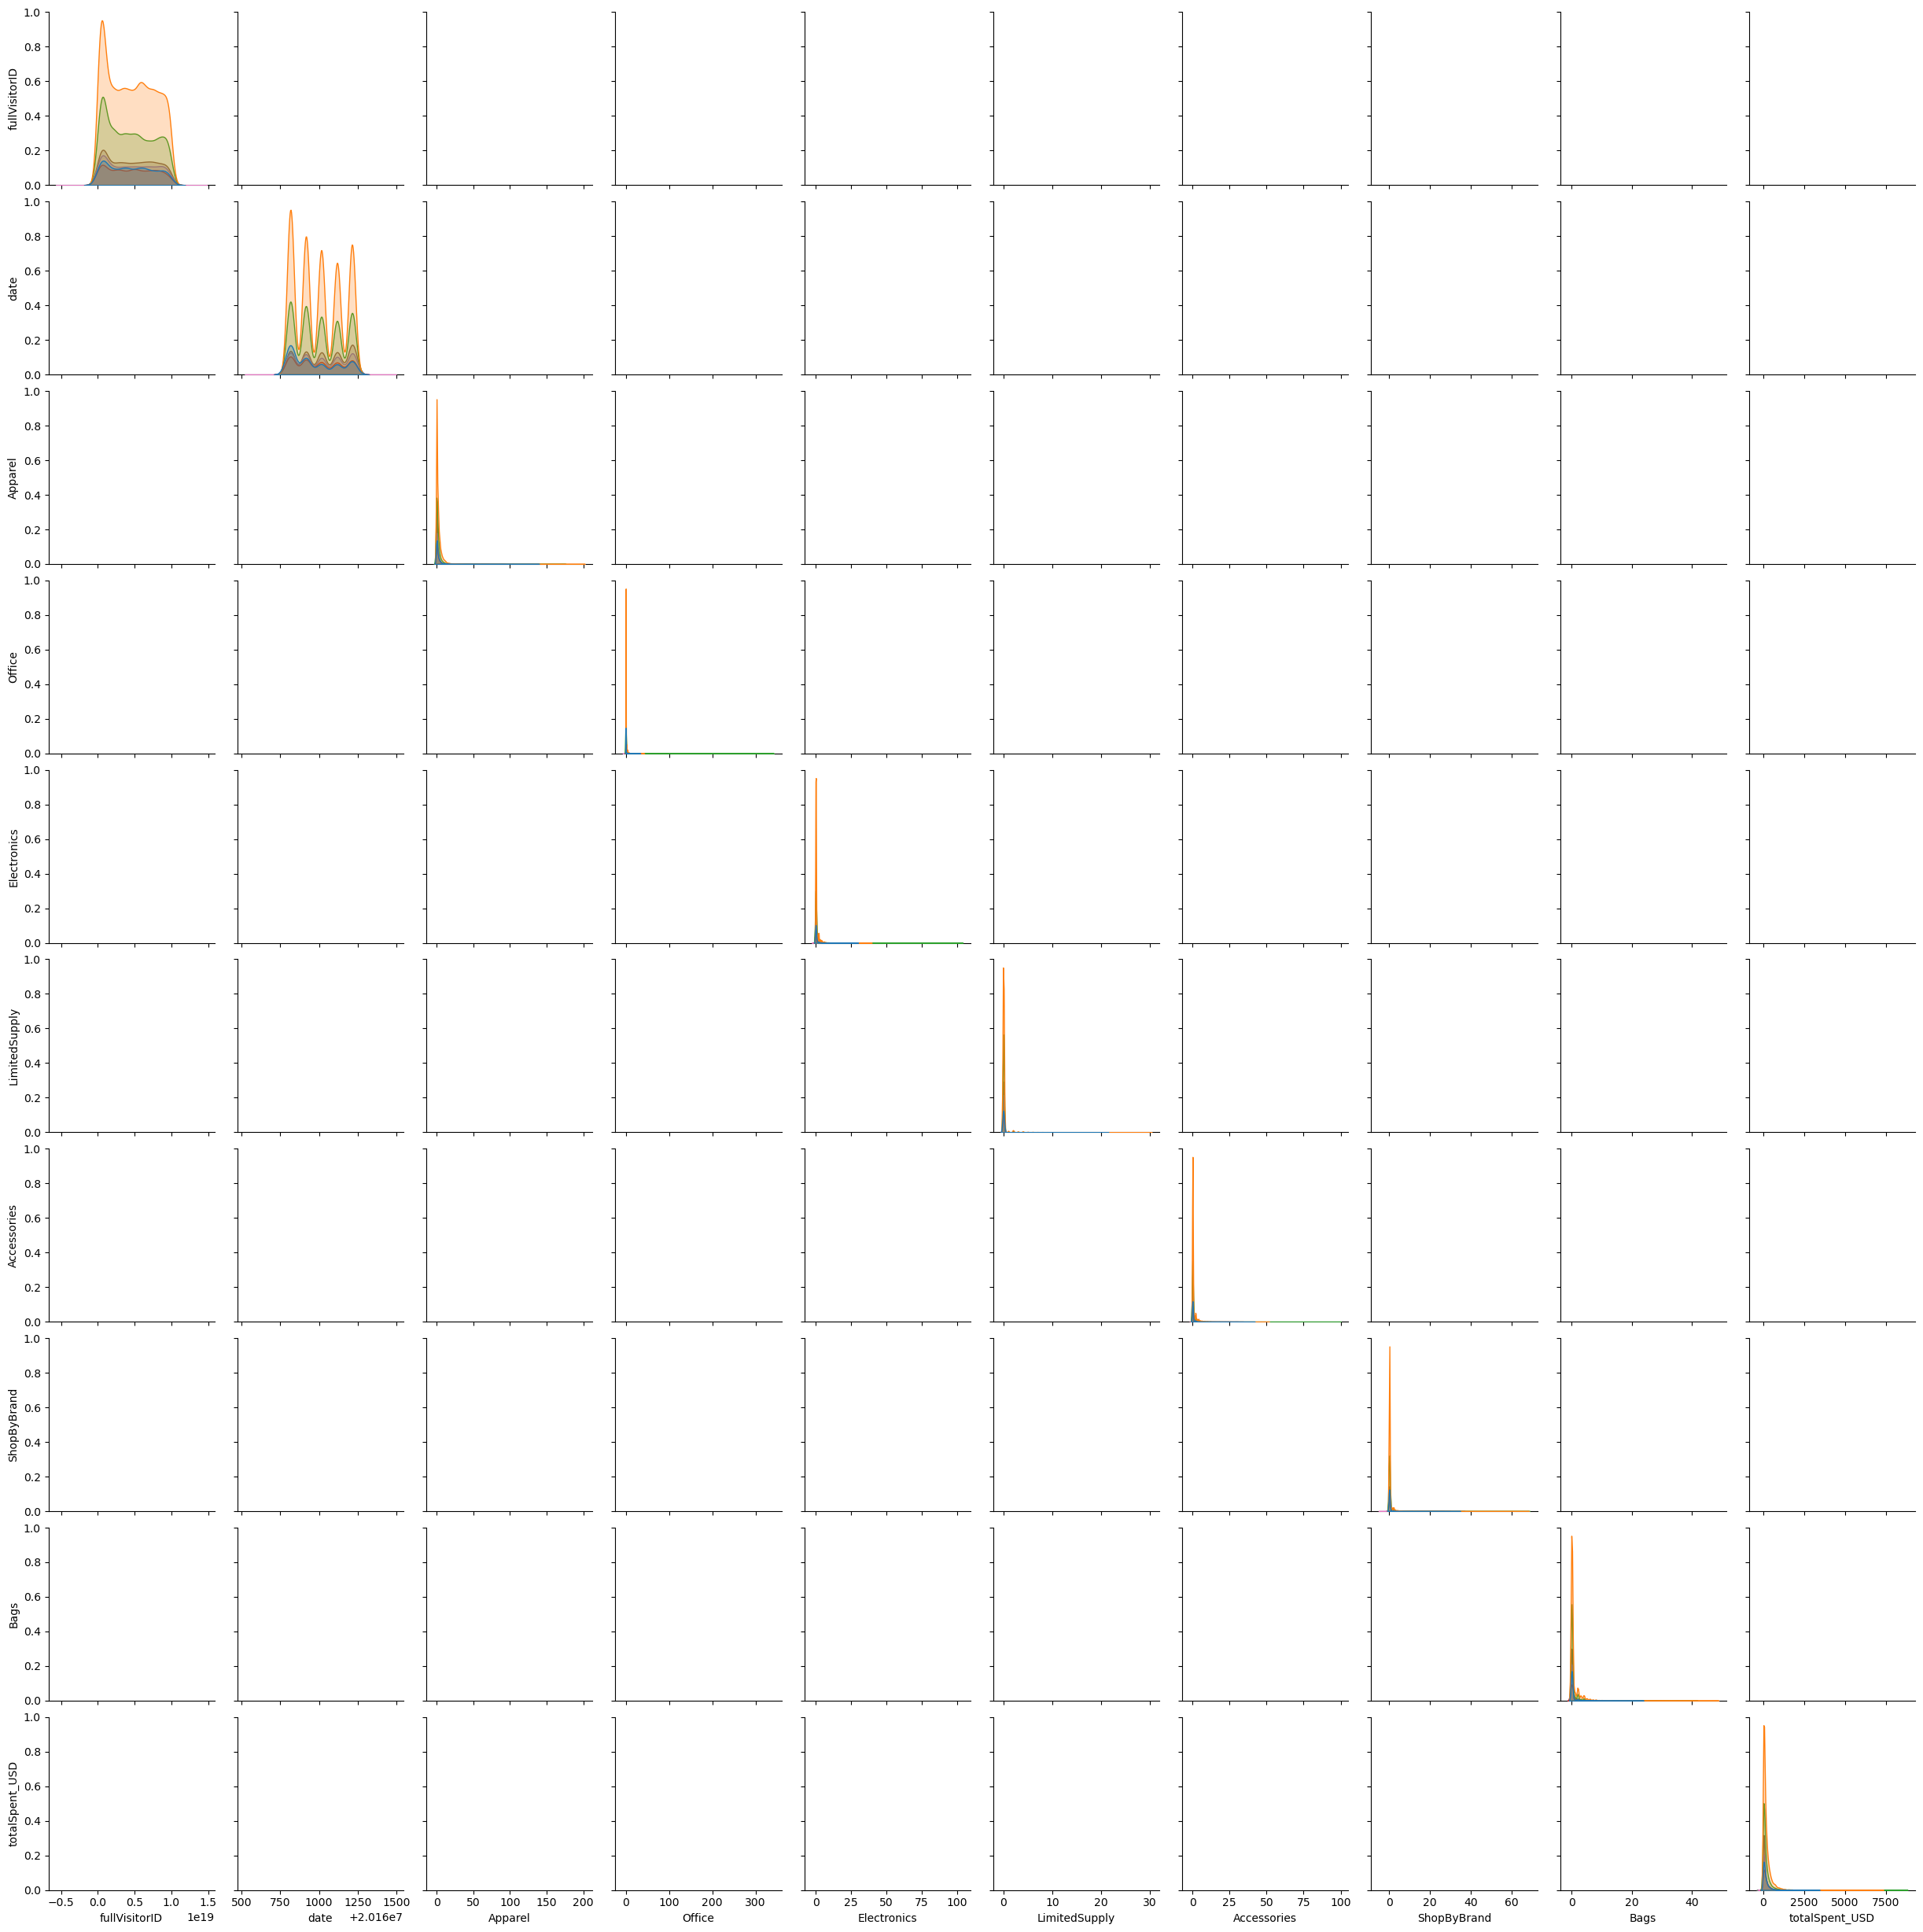

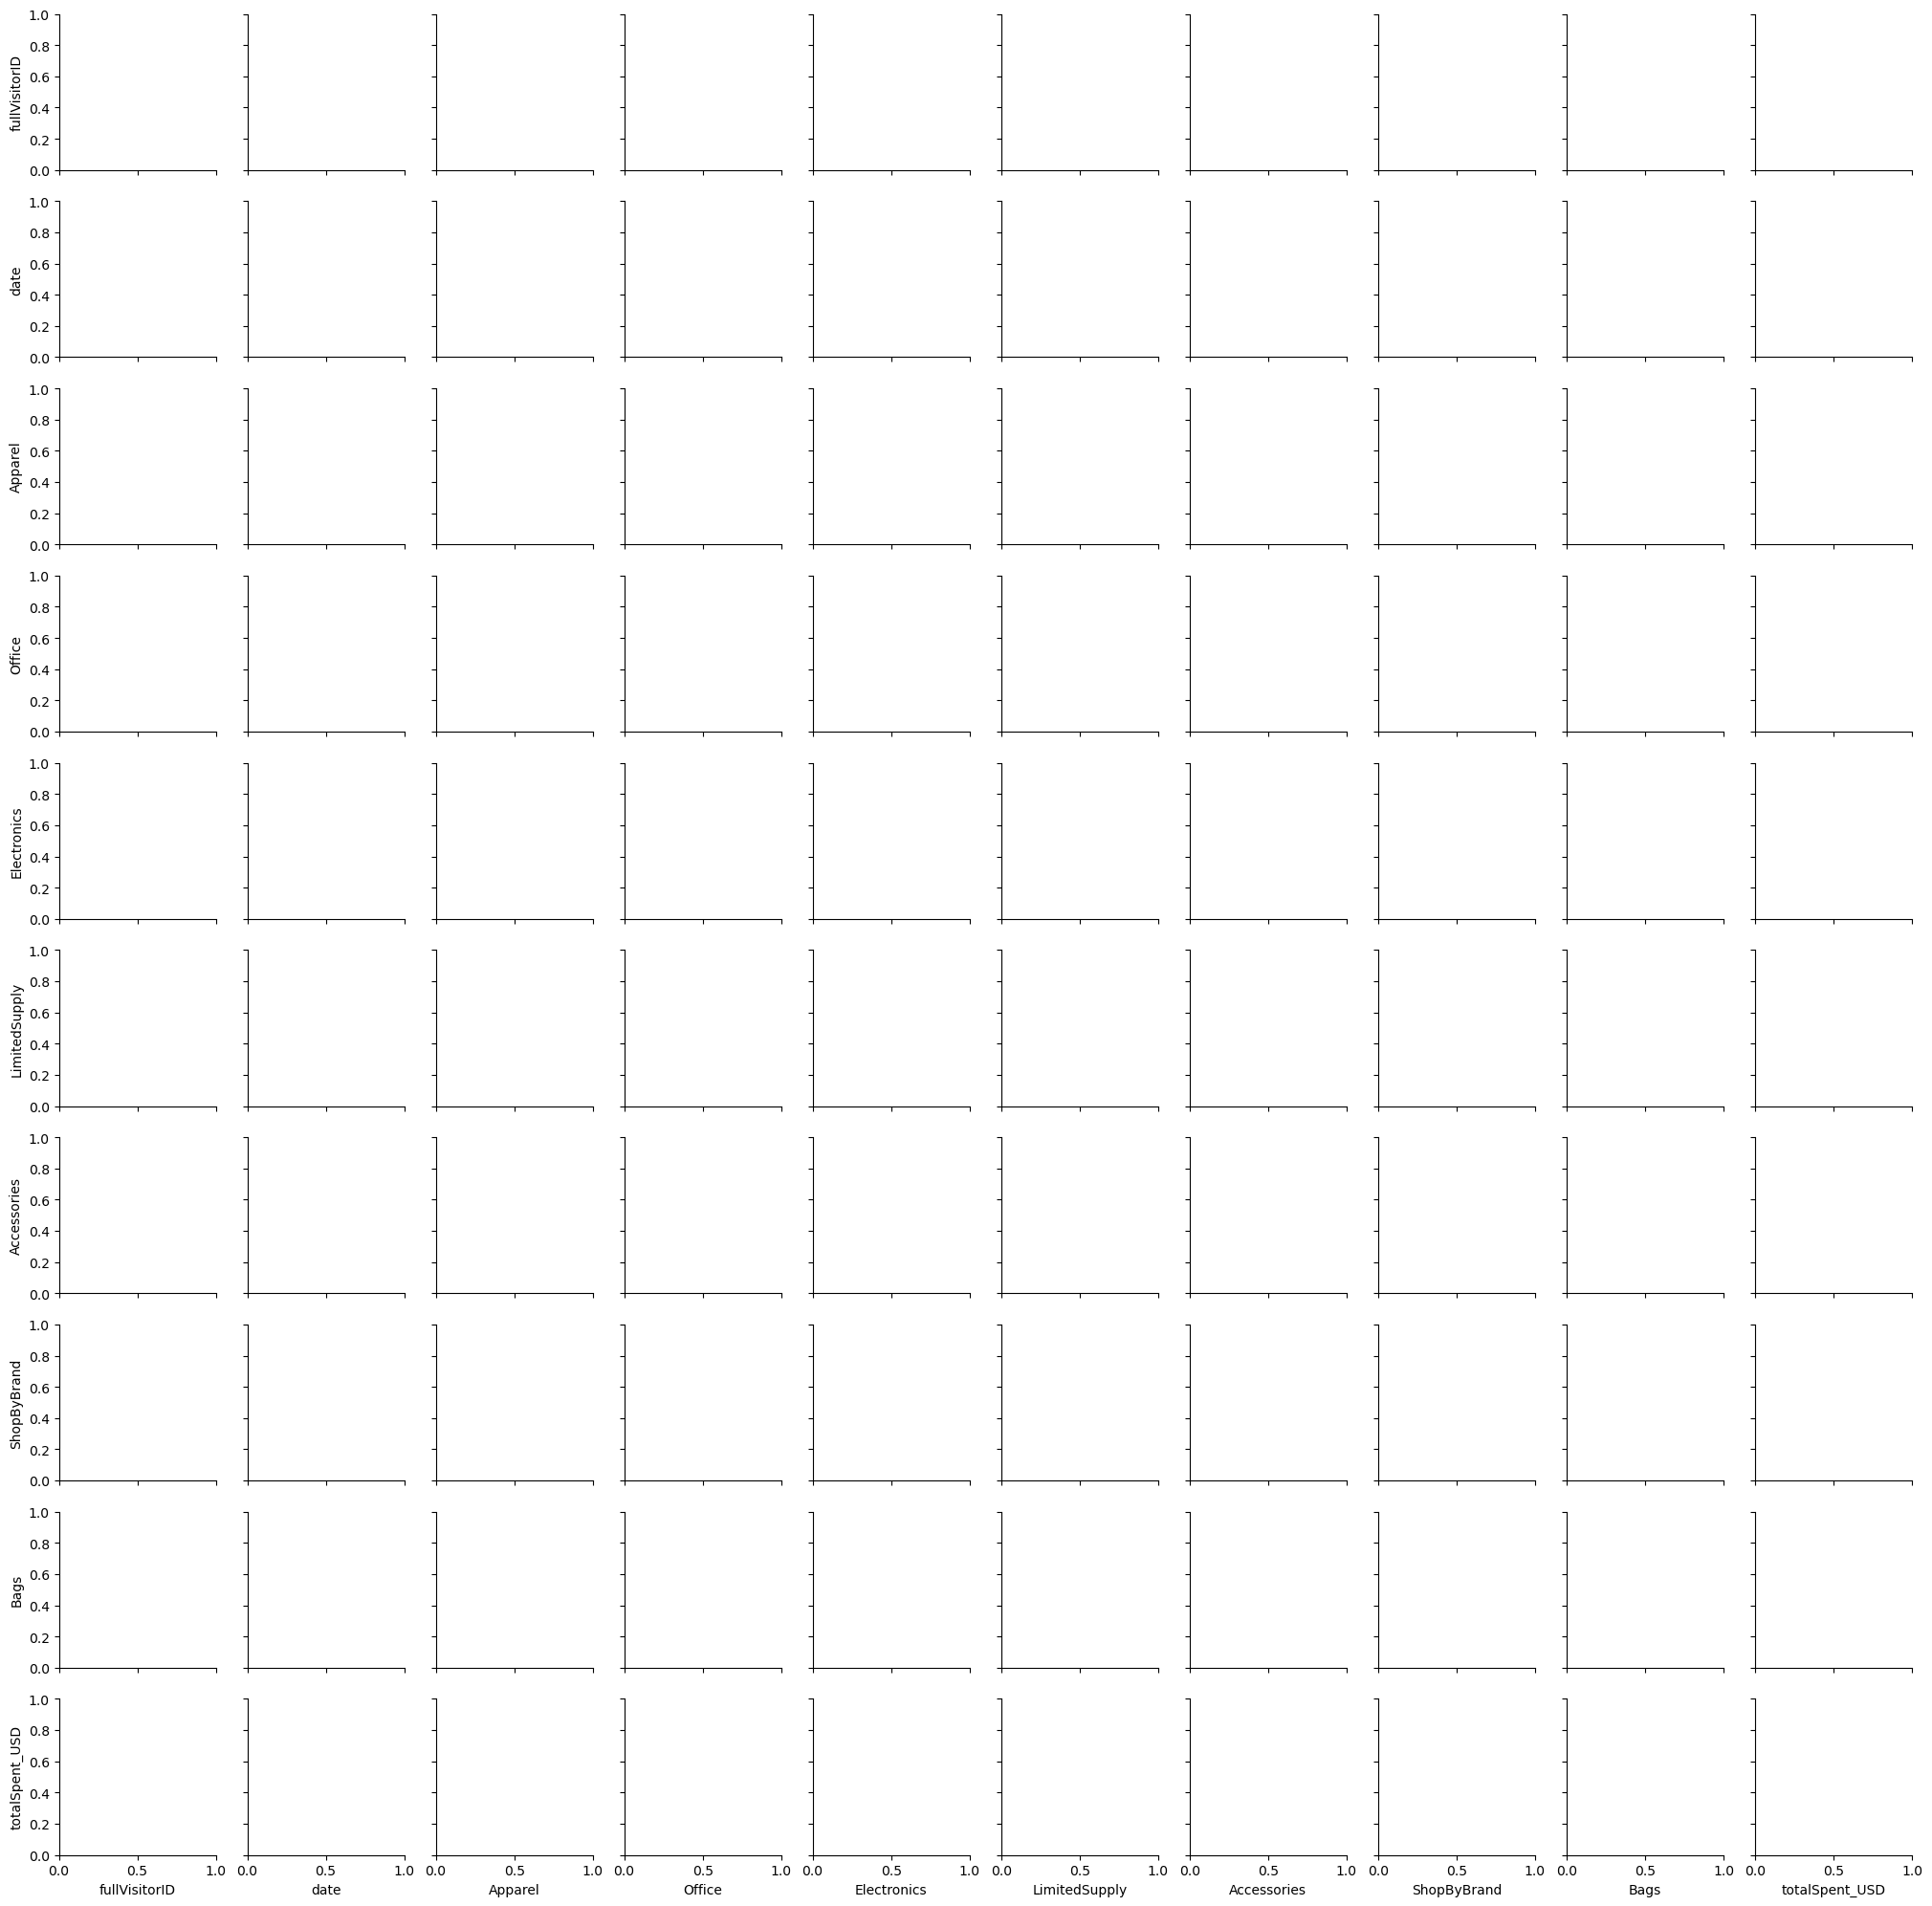

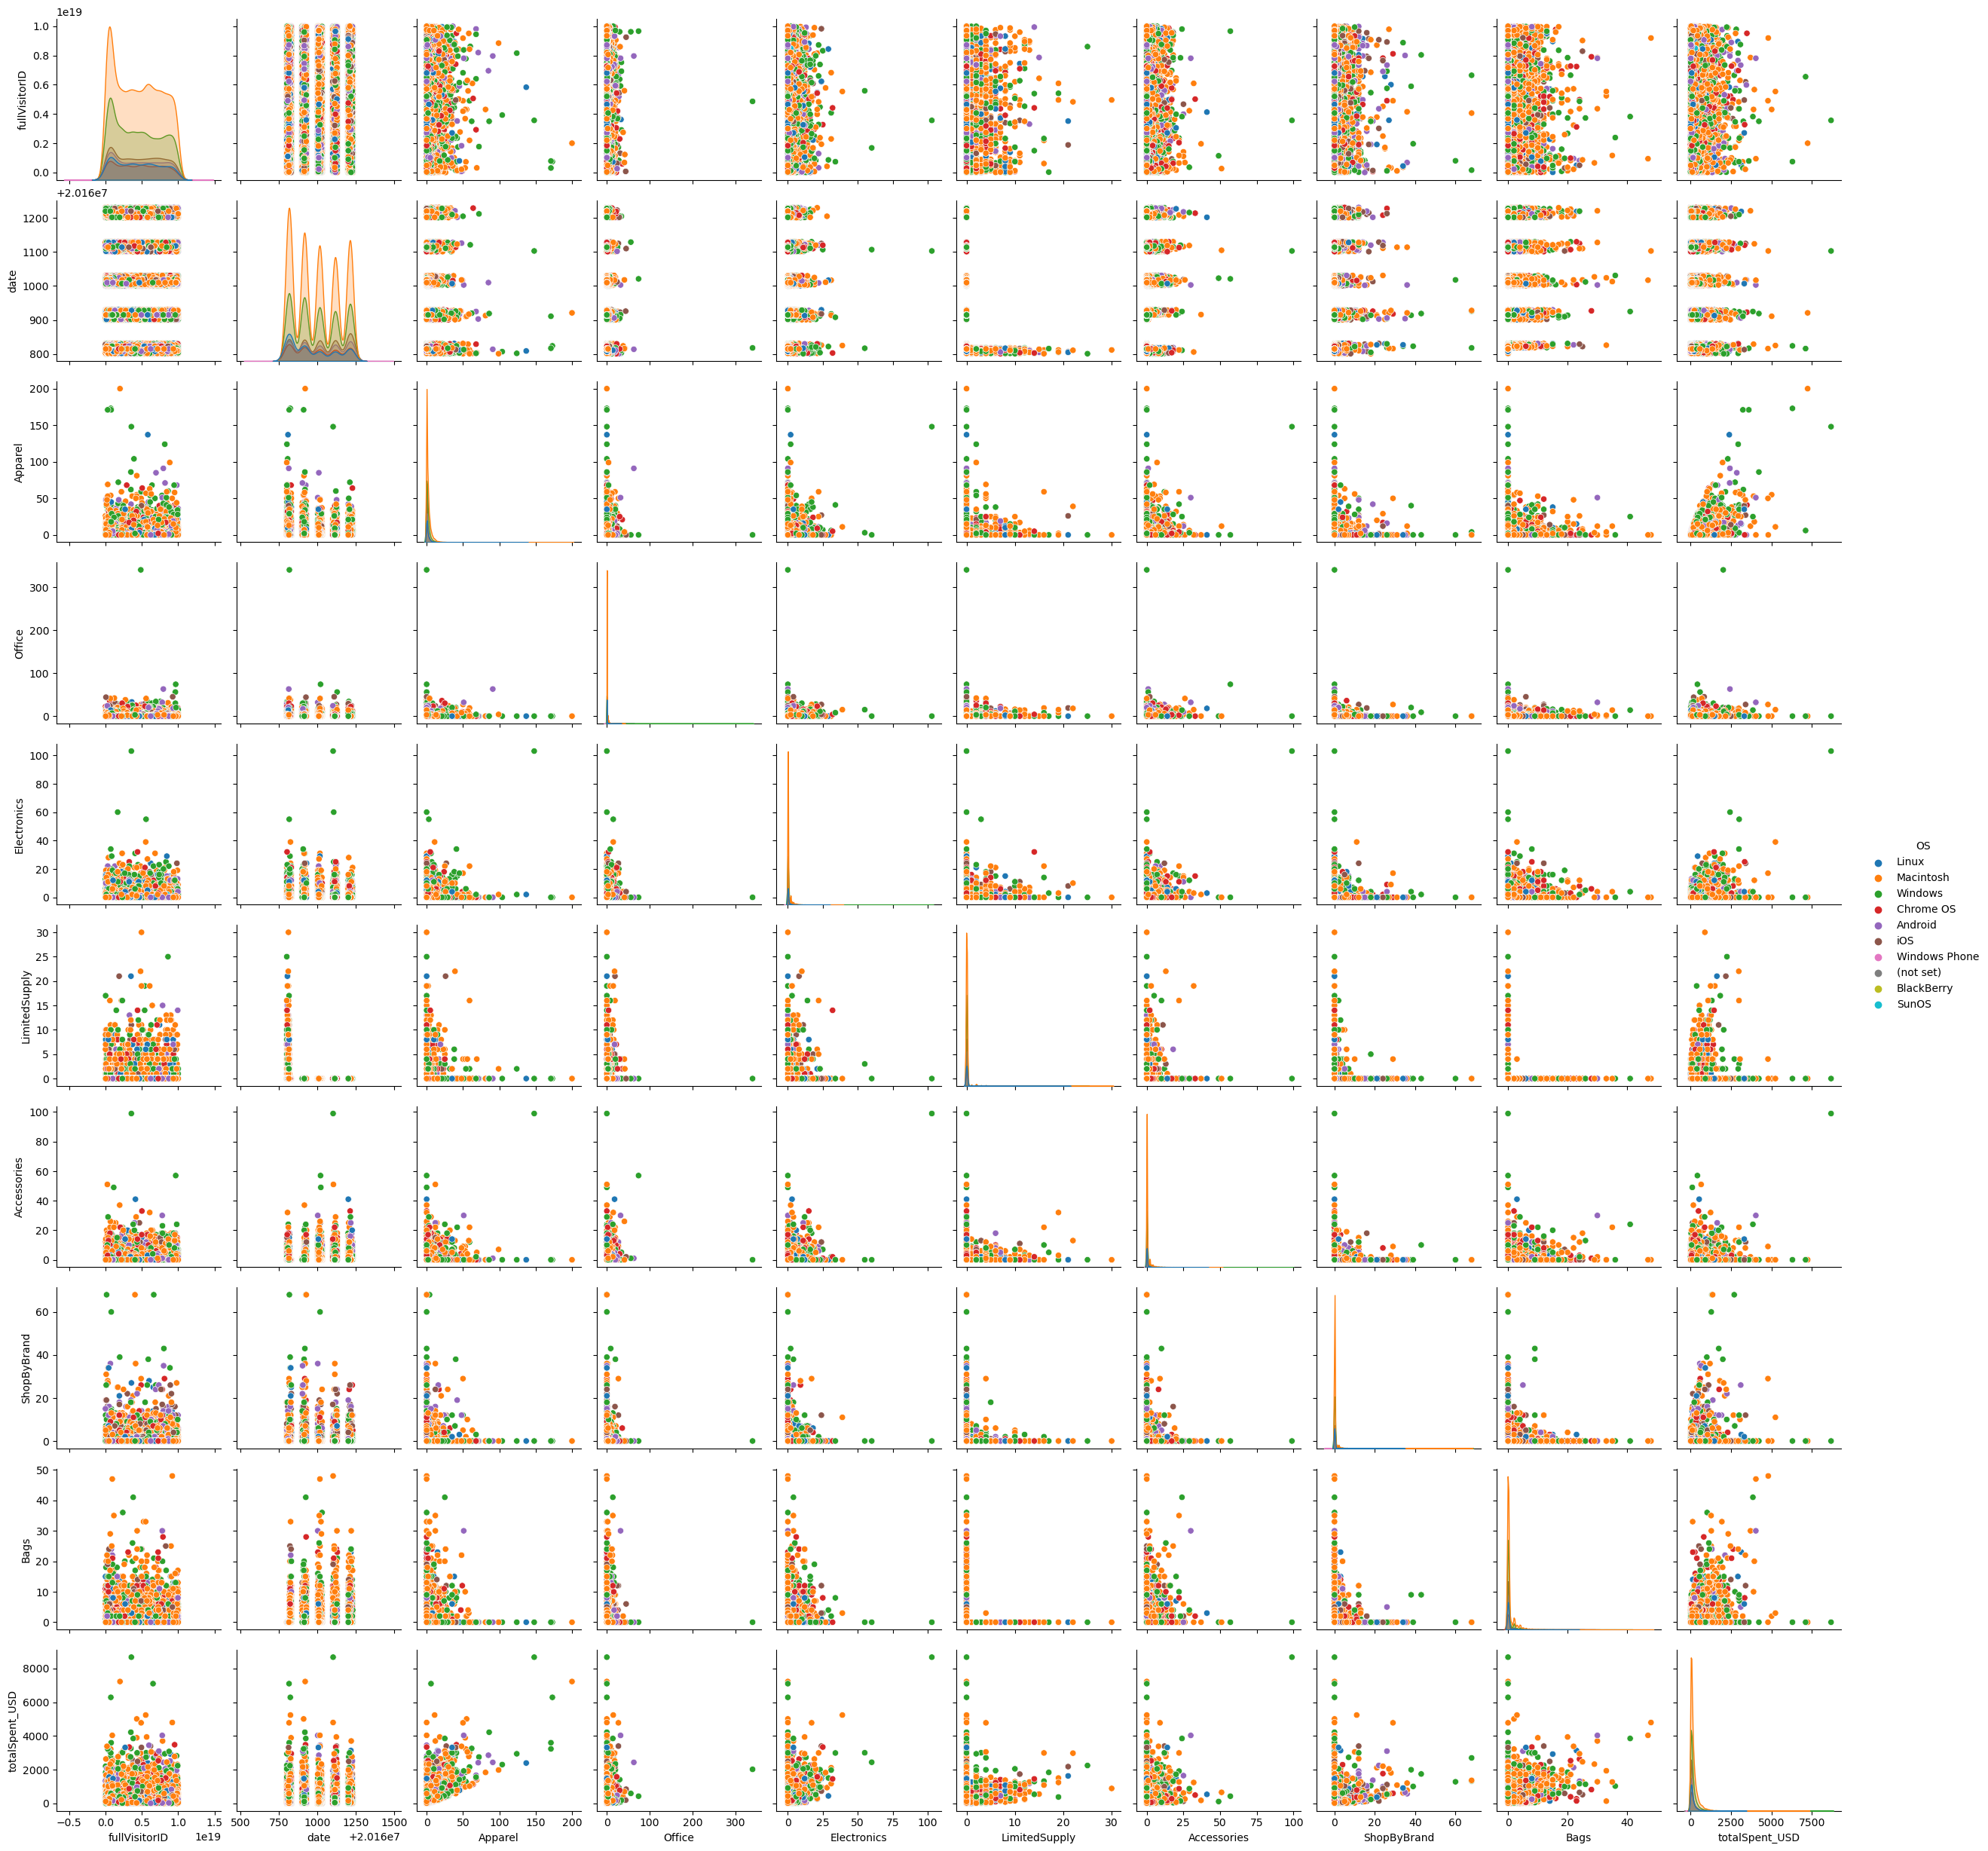

In [48]:
sns.pairplot(df, hue='OS')
plt.show()

In [49]:
df.head()

,fullVisitorID,channelgrouping,date,OS,Apparel,Office,Electronics,LimitedSupply,Accessories,ShopByBrand,Bags,totalSpent_USD
0,2886674552607729793,Referral,20160901,Linux,0,0,1,0,0,0,0,5.59
1,876940283010756174,Referral,20160901,Macintosh,1,0,0,0,0,0,0,33.99
2,1957458976293878100,Organic Search,20160901,Windows,0,0,2,0,0,0,0,329.47
3,3044311821343900129,Organic Search,20160901,Macintosh,0,0,0,0,0,0,0,1.99
4,3890747985732303742,Organic Search,20160901,Macintosh,1,0,0,0,0,0,0,51.99


Gráficas a revisar:
* Diagrama de frecuencias de cantidad de transacciones realizadas del medio por el cual se hizo la solicitud.
* Diagrama de frecuencias de cantidad de transacciones realizadas del medio por el cual se hizo la solicitud.
* Fechas vs cantidad de compras por categoría de producto.
* Fechas vs Total gastado.
* Diagrama de barras de la cantidad de productos comprados por categoría.
* Histograma de la información del total gastado. 
* Clasificar por Medio y ver digrama de barras por monto total gastado.
* Clasificar por Dispositivo utilizado y ver digrama de barras por monto total gastado.
